In [26]:
using Calculus
using LinearAlgebra
using ForwardDiff
using LineSearches

abstract type FirstOrderOptimizer end

struct GradientDescent <: FirstOrderOptimizer
end

init!(M::GradientDescent, f, ∇f, x) = M

function step!(M::GradientDescent, f, ∇f, xₖ)
    # Normalized descent direction
    dₖ = -∇f(xₖ)

    # Find αₖ such that the univariate function ϕₖ(α) = f(xₖ - α⋅∇f(xₖ)) is minimized.
    # Jagged search paths result if we choose a step-size that leads to the
    # maximal decrease in f. In fact, the next direction will always be orthogonal
    # to the current direction.

    # As exact line searches can be costly, we are satisfied by an approximate line
    # search, such that the Armijo condition is met.
    
    αₖ,_ = LineSearches.exact_line_search(f, xₖ, dₖ)
    # αₖ = LineSearches.backtracking_line_search(f, ∇f, xₖ, dₖ, 1e2)
    return xₖ .+ αₖ .* dₖ
end

"""
# Gradient Descent
## Constructor
GradientDescent(; alphaguess = LineSearches.InitialArmijo(), linesearch = LineSearches.Armijo())

## Description
The `GradientDescent` method is a simple descent algorithm, in which the search
direction is simply the negative gradient of the current iterate, and then a line-search
step is used to compute the step-size αₖ. See Chong and Zak (Ch 8.2) for an explanation of
the approach.

## References
 - Chong, Edwin K.P. and Zak, Stanislaw H., An introduction to Optimization. Wiley Publications
"""
function GradientDescentAlgorithm(f, x₀, ϵ=1e-5)
    # Gradient descent requires an initial point. The minimizer obtained is determined
    # by the initial point. Thus, the gradient descent algorithm may get stuck
    # in suboptimal local minima.
    ∇f(x) = ForwardDiff.gradient(f, x)
    gradDescent = init!(GradientDescent(), f, ∇f, x₀)
    x₁ = step!(gradDescent, f, ∇f, x₀)

    X = Vector{Array{Float64,1}}()
    push!(X, x₀)
    push!(X, x₁)

    k = 1
    while(abs((f(X[k+1]) - f(X[k]))/f(X[k])) > ϵ)
        k += 1
        x  = step!(gradDescent, f, ∇f, X[k])
        push!(X, x)
    end
    
    k+=1
    
    print("\n* Candidate Solution")
    print("\n  Minimizer : ", X[k])
    print("\n  Minimum : ", f(X[k]))
    print("\n")
    print("\n* Work Counters")
    print("\n  Iterations :", k)
    return X[k]
end


GradientDescentAlgorithm

In [1]:
push!(LOAD_PATH, "./line_searches")
push!(LOAD_PATH, "./bracketing")

5-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "./line_searches"
 "./bracketing"

In [ ]:
using Plots

rosenbrock(x) = (1-x[1])^2 + 100*(x[2]-x[1]^2)^2

x = range(-2.048,2.048,length=1000)
y = range(-2.048,2.048,length=1000)
z = (x,y)-> rosenbrock([x,y])

surface(x,y,z)

In [27]:
x₀ = [-3.0,-4.0]
x_min, X = GradientDescentAlgorithm(rosenbrock,x₀,1e-5)


* Candidate Solution
  Minimizer : [0.9999999999999922, 0.9999999999999843]
  Minimum : 6.162975822039155e-29

* Work Counters
  Iterations :8023

2-element Array{Float64,1}:
 0.9999999999999922
 0.9999999999999843

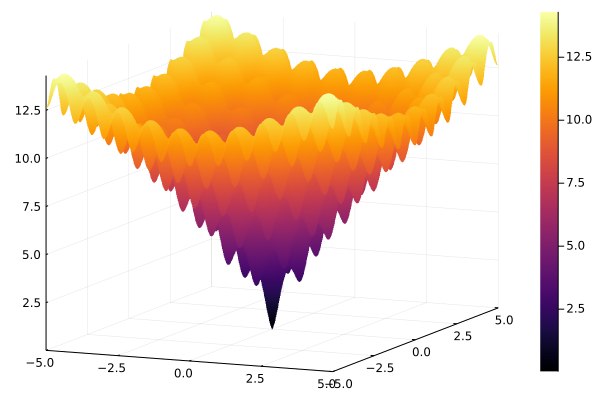

In [33]:
using Plots

ackley(x) = -20*exp(-0.2*sqrt(0.5*(x[1]^2 + x[2]^2))) - exp(0.5*(cos(2π*x[1])+cos(2π*x[2]))) + exp(1) + 20

x = range(-5.00,5.00,length=1000)
y = range(-5.00,5.00,length=1000)
z = (x,y)-> ackley([x,y])

surface(x,y,z)

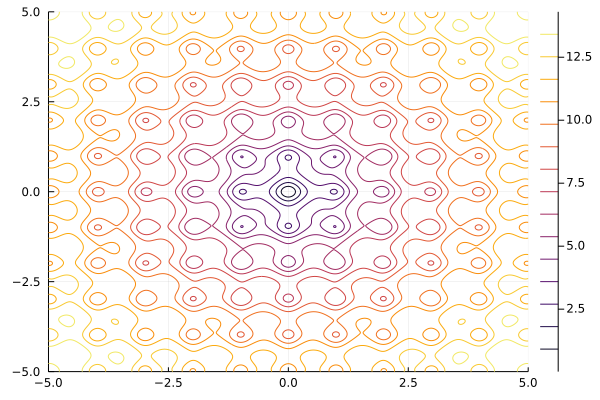

In [31]:
contour(x,y,z)

In [34]:
x₀ = [-0.5,-0.5]
x_min, X = GradientDescentAlgorithm(ackley,x₀,1e-5)


* Candidate Solution
  Minimizer : [-4.883423040693337e-6, -4.883423040693337e-6]
  Minimum : 1.9534962220291163e-5

* Work Counters
  Iterations :37822

2-element Array{Float64,1}:
 -4.883423040693337e-6
 -4.883423040693337e-6